# EDA - Exploratory Data Analysis

### EDA checklist


* What question(s) are you trying to solve (or prove wrong)?
    - What is our target and what do we want to accomplish 
* What kind of data do you have and how do you treat different types?
    - Numerical - Categorical (what is the best way to encode for this data ?)
* What’s missing from the data and how do you deal with it?
    - Imputing
* Where are the outliers and why should you care about them?
    - Visualization, distribution
* How can you add, change or remove features to get more out of your data?
    - Feature engineering

## Imports

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import missingno as msno
print('imports done')

imports done


## Load Data

In [ ]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')
print('data loaded')

In [ ]:
# extract labels
train_labels = train_data.pop('Survived')
print('train labels shape: ', str(train_labels.shape))
print('labels extracted')


## EDA

### Shapes

We have 11 features for each passenger in the dataset

In [ ]:
print('train shape: ' + str(train_data.shape))
print('test data shape: '+ str(test_data.shape))

### Training data info

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [8]:
train_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* We find that keeping the `passengerId` is not necessary since it does not contribute to the model processing

* `Ticket` has weird values and is not consistent, also the information of each ticket is already in `Pclass` feature, so we'll leave out `Ticket`

* The feature with most missing values is `Cabin` we'll leave it out

## Types of Data

### What kind of data do we have and how are we going to treat different types ? 


* We have structured data represented in a spreadsheet aka csv
* We have categorical and numerical values
* We have missing data in some features

#### Things to do in this section 

* Identify the nature of data (discrete, continuous, nominal, ordinal)
* Check data distribution and identify outliers
* Determine the best way to encoding for categorical data
* Determine the best way to imputing for missing data 
* Determine the best normalization technique

### Categorical Data

#### Check the info of the categorical data

In [10]:
# Extract the categorical values
cat_cols = train_data.select_dtypes(include=('object')).columns.to_list()
cat_data_df = train_data[cat_cols] # convert cat_cols to a dataframe
print(cat_cols)
print('number of cat_cols: ' + str(len(cat_cols)))
cat_data_df.info()
cat_data_df

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
number of cat_cols: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      891 non-null    object
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
dtypes: object(5)
memory usage: 34.9+ KB


,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [11]:
# Basic statistics for categorical values
ds_cat_stats = pd.DataFrame(columns = ['column', 'values', 'values_count_incna', 'values_count_nona', 'num_miss', 'pct_miss'])
tmp = pd.DataFrame()
for c in cat_data_df.columns:
    tmp['column'] = [c]
    tmp['values'] = [cat_data_df[c].unique()]
    tmp['values_count_incna'] = len(list(cat_data_df[c].unique()))
    tmp['values_count_nona'] = int(cat_data_df[c].nunique())
    tmp['num_miss'] = cat_data_df[c].isnull().sum()
    tmp['pct_miss'] = (cat_data_df[c].isnull().sum()/ len(cat_data_df)).round(3)*100
    ds_cat_stats = pd.concat([ds_cat_stats, tmp], ignore_index=True)
ds_cat_stats

,column,values,values_count_incna,values_count_nona,num_miss,pct_miss
0,Name,"[Braund, Mr. Owen Harris, Cumings, Mrs. John B...",891,891,0,0.0
1,Sex,"[male, female]",2,2,0,0.0
2,Ticket,"[A/5 21171, PC 17599, STON/O2. 3101282, 113803...",681,681,0,0.0
3,Cabin,"[nan, C85, C123, E46, G6, C103, D56, A6, C23 C...",148,147,687,77.1
4,Embarked,"[S, C, Q, nan]",4,3,2,0.2


#### Categorical Data Visualization

##### Cardinality

**Cardinality** refers to the number of unique values within a categorical feature or variable in a dataset. In other words, it quantifies the diversity of categories or levels that a categorical variable can take on.

**Low cardinality:** A categorical variable with low cardinality has a small number of unique values. For example, a "Gender" variable might have values like "Male" and "Female," resulting in low cardinality.

**High cardinality:** A categorical variable with high cardinality has a large number of unique values. For instance, a "Product ID" variable in a retail dataset could have a multitude of unique IDs, leading to high cardinality.

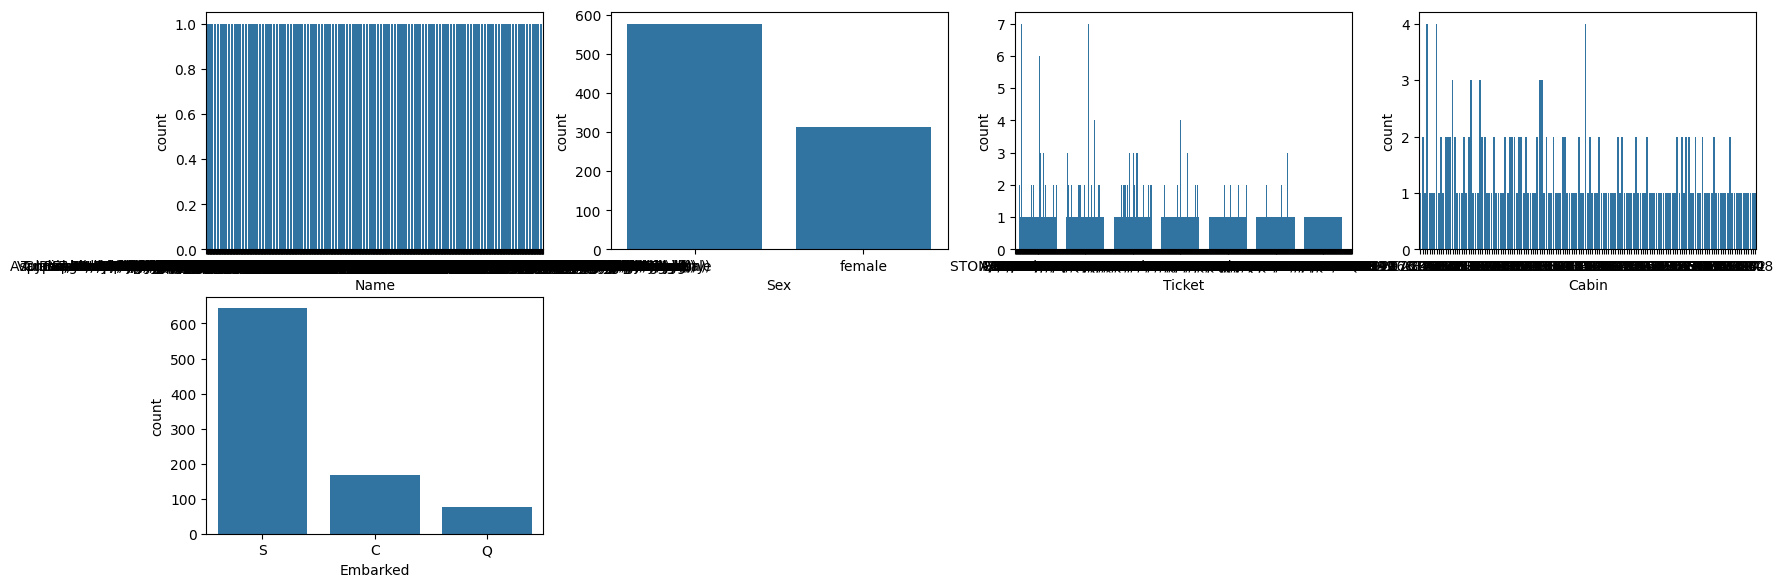

In [12]:
# Plot cardinality for categorical values
cardinalityCatFig = plt.figure(figsize=(20, 40))
ax = []
for i, val in enumerate(cat_cols): # iterate over categorical values
    ax.append(cardinalityCatFig.add_subplot(11, 4, i+1)) # create subplots
    ax.append(sns.countplot(data = train_data, x=val)) # count cardinality on x based on train_dataset
plt.show()
cardinalityCatFig.tight_layout()

**So we can conclude that the features with highest cardinality are `name`, `ticket` and `cabin` and the lowest are `Sex` and `Embarked`** , this means that `name`, `ticket`, and `cabin` are the features with most unique values and `sex`, `embarked` are the features with fewer unique values

##### CrossTab - for correlation between features

Generaly the crosstab allows to find the relationship between variables, so we are going to create a cross-tabulation or contingency table using `pd.crosstab()` to calculate the frequencies of combinations between the categorical variables:

In [13]:
cross_tab = pd.crosstab(index=cat_data_df['Sex'], columns=[cat_data_df[col] for col in cat_cols[0:]])
cross_tab

Name,"Allen, Miss. Elisabeth Walton","Allison, Master. Hudson Trevor","Allison, Miss. Helen Loraine","Allison, Mrs. Hudson J C (Bessie Waldo Daniels)","Anderson, Mr. Harry","Andrews, Miss. Kornelia Theodosia","Andrews, Mr. Thomas Jr","Appleton, Mrs. Edward Dale (Charlotte Lamson)","Astor, Mrs. John Jacob (Madeleine Talmadge Force)","Aubart, Mme. Leontine Pauline",...,"Walker, Mr. William Anderson","Warren, Mrs. Frank Manley (Anna Sophia Atkinson)","Webber, Miss. Susan","White, Mr. Percival Wayland","White, Mr. Richard Frasar","Wick, Miss. Mary Natalie","Widener, Mr. Harry Elkins","Williams-Lambert, Mr. Fletcher Fellows","Woolner, Mr. Hugh","Young, Miss. Marie Grice"
Sex,female,male,female,female,male,female,male,female,female,female,...,male,female,female,male,male,female,male,male,male,female
Ticket,24160,113781,113781,113781,19952,13502,112050,11769,PC 17757,PC 17477,...,36967,110813,27267,35281,35281,36928,113503,113510,19947,PC 17760
Cabin,B5,C22 C26,C22 C26,C22 C26,E12,D7,A36,C101,C62 C64,B35,...,D46,D37,E101,D26,D26,C7,C82,C128,C52,C32
Embarked,S,S,S,S,S,S,S,S,C,C,...,S,C,S,S,S,S,C,S,S,C
Sex,,,,,,,,,,,,,,,,,,,,,
female,1,0,1,1,0,1,0,1,1,1,...,0,1,1,0,0,1,0,0,0,1
male,0,1,0,0,1,0,1,0,0,0,...,1,0,0,1,1,0,1,1,1,0


##### HeatMap

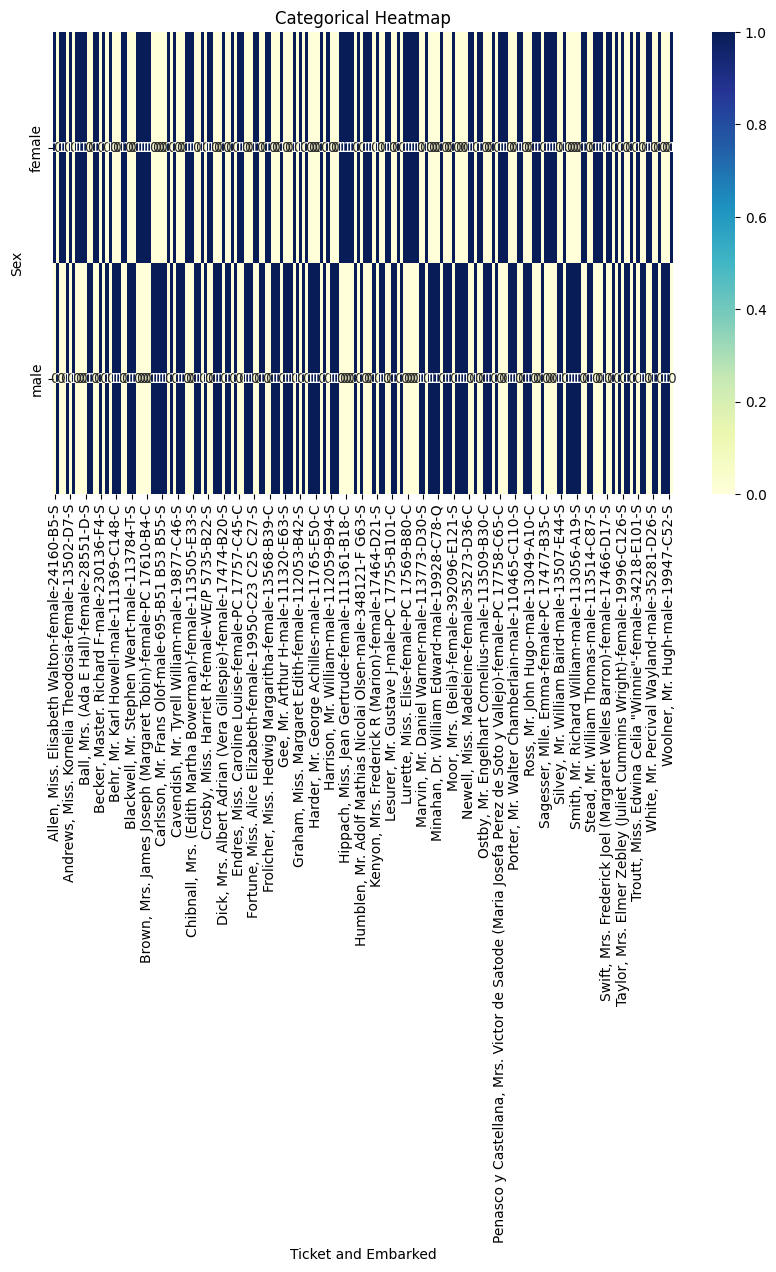

In [14]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.heatmap(cross_tab, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.title('Categorical Heatmap')
plt.xlabel('Ticket and Embarked')
plt.ylabel('Sex')
plt.show()

##### Violin plots - Swarmplots with BarCharts (CountPlot)

Here we are going to take a closer look at the frequency distribution of the categorical data. Since we are working on a supervised ML problem we should also look at the relationship between the dependent variable and independent variable. In order to do that let's add our dependent variable to this dataset.

In [15]:
# Here we append the target feature temporary for cat data visualization
temp_cat_data_df = cat_data_df
train_labels_df = train_labels.to_frame(name='Survived')
temp_cat_data_df = pd.concat([temp_cat_data_df, train_labels_df], axis=1)
temp_cat_data_df

,Name,Sex,Ticket,Cabin,Embarked,Survived
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,1
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,1
4,"Allen, Mr. William Henry",male,373450,NaN,S,0
...,...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S,0
887,"Graham, Miss. Margaret Edith",female,112053,B42,S,1
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S,0
889,"Behr, Mr. Karl Howell",male,111369,C148,C,1


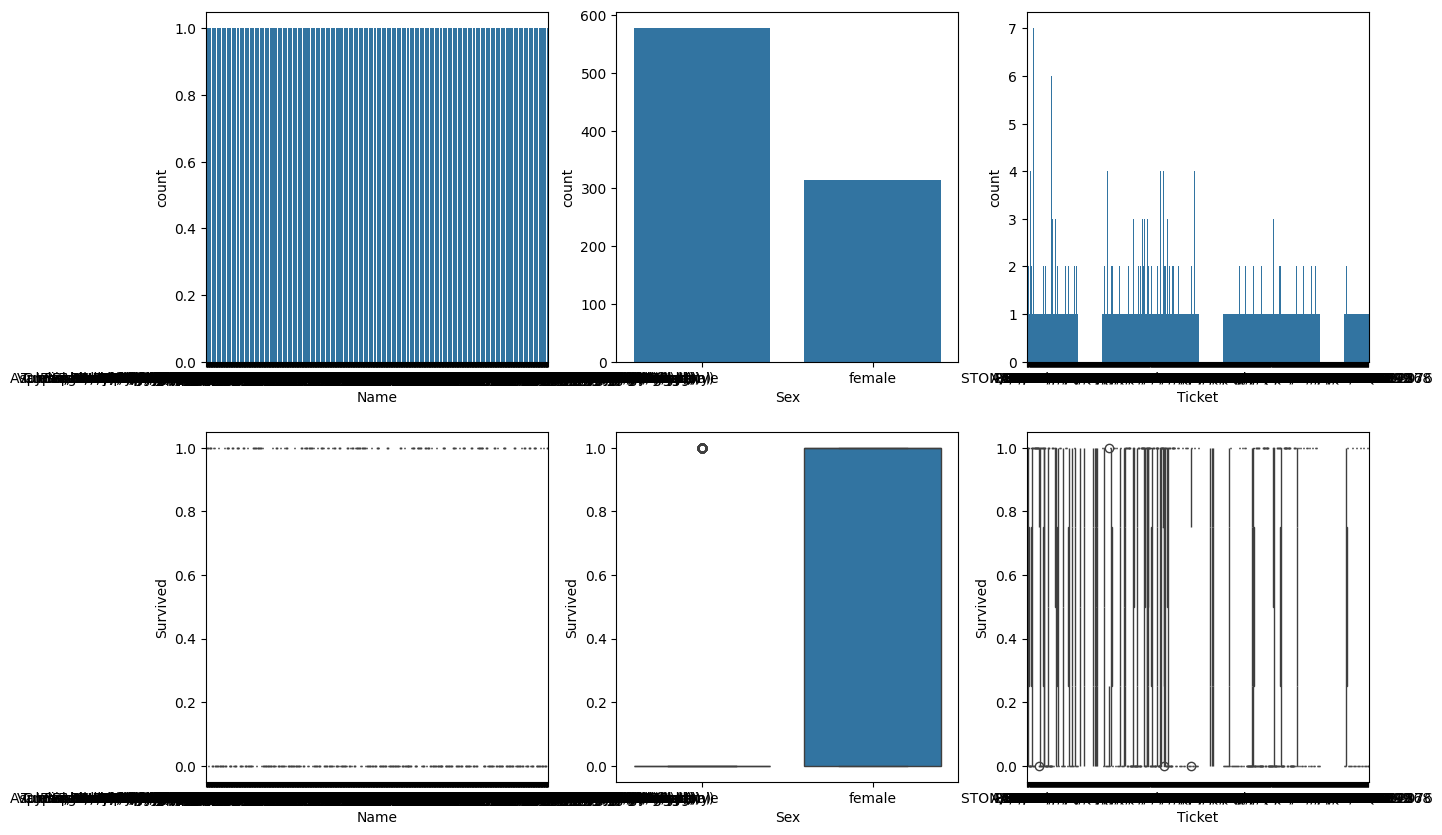

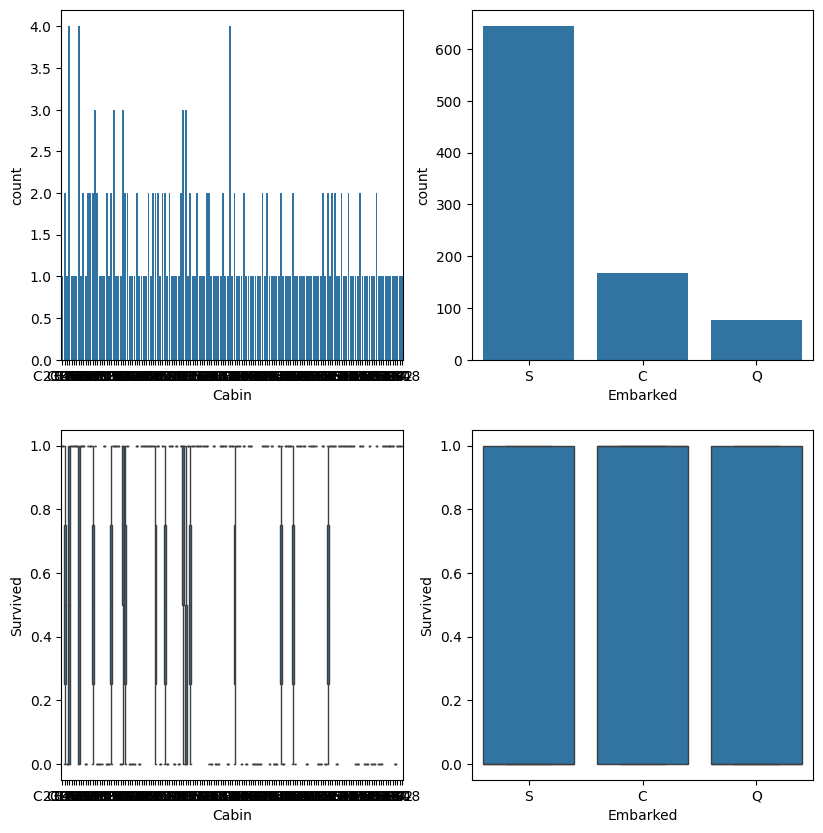

<Figure size 1500x1000 with 0 Axes>

In [16]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(temp_cat_data_df.columns):
    if ix <= 3:
        if c != 'Survived':
            ax1 = fig.add_subplot(2,3,ix)
            sns.countplot(data = temp_cat_data_df, x=c, ax = ax1)
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.boxplot(data=temp_cat_data_df, x=c, y='Survived', ax=ax2)
            # sns.violinplot(data=temp_cat_data_df, x=c, y='Survived', ax=ax2)
            # sns.swarmplot(data = temp_cat_data_df, x=c, y ='Survived', color = 'k', alpha = 0.4, ax=ax2)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

##### Missing Categorical Data

<Axes: >

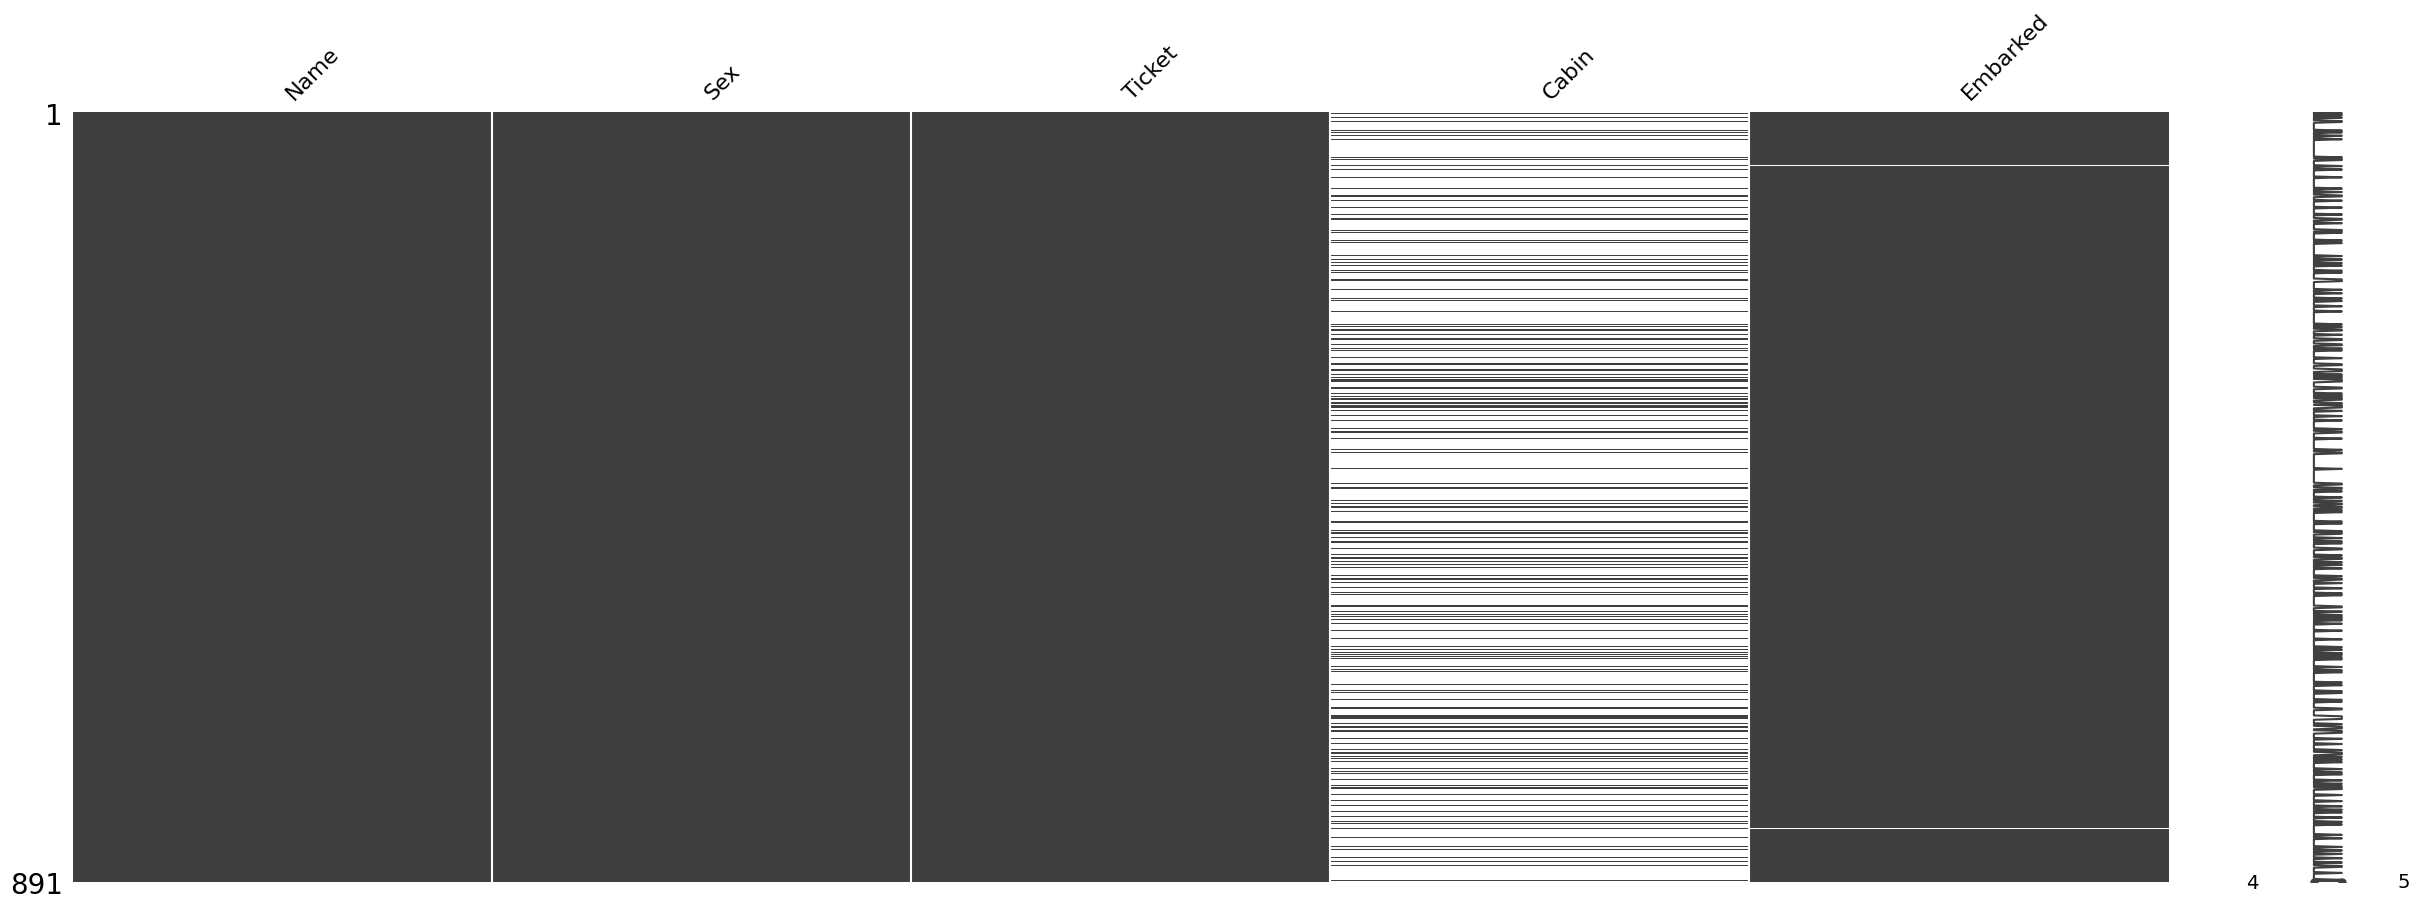

In [21]:
# Missing Categorical Values
msno.matrix(cat_data_df, figsize=(30,10))

#### Conclusion on Categorical values

* Definetly we'll remove `Cabin` because it has too many missing values and `Ticket` because is incosistent and it's values are implicit in the `Pclass` feature
* Generally it is hard to find outliers in categorical data, but sometimes just with the countplots we can notice if they are present in a feature

##### Name

| **Nature**           | Categorical - Nominal                                                                                                    |
|----------------------|--------------------------------------------------------------------------------------------------------------------------|
| **Feature Engineering** | We see that names are like `Mitkoff, Mr. Mito`, `Mitkoff, Mr. Mito`, `Dodge, Master. Washington` so we can divide each `name` into `last_name, title. name` so we'll have a column only for title because it will be worth to create a new feature with the titles of each passenger, we can call it `name_title` and concatenate `name` with `last_name` in another column, this last one without the comma. |
| **Encoding**         | *Label encoding* for `name_title`, since we have `miss`, `mrs`, `mr` each could be labeled; for `name` and `last_name` we can use one-hot encoding, this because these features typically contains unique identifiers for each passenger and doesn't behave like a label. |
| **Missing values and Imputing**   | We don't have missing values for this one :)                                                                              |

##### Sex

| **Nature**           | Categorical - Nominal                                                                                                    |
|----------------------|--------------------------------------------------------------------------------------------------------------------------|
| **Feature Engineering** | No special feature engineering for this one
| **Encoding**         | *One-hot encoding* can create binary caolumns and let know the presence of one of female or male values |
| **Missing values and imputing**   | We don't have missing values for this one :)                                                                              |

##### Embarked

| **Nature**           | Categorical - Nominal                                                                                                    |
|----------------------|--------------------------------------------------------------------------------------------------------------------------|
| **Feature Engineering** | No special feature engineering for this one
| **Encoding**         | *One-hot encoding* can create binary caolumns and let know the presence of one these values |
| **Missing values and imputing**   |  there is one value missing, we can populate with the mode of the feature                                   |


### Numerical Data

#### Check the info of the numerical data

In [22]:
# Extract the numerical values
num_cols = train_data.select_dtypes(exclude=('object')).columns.tolist()
num_data_df = train_data[num_cols]
print(num_cols)
print('number of num cols: ' + str(len(num_cols)))
num_data_df.info()
num_data_df

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
number of num cols: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Age          714 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000
887,888,1,19.0,0,0,30.0000
888,889,3,NaN,1,2,23.4500
889,890,1,26.0,0,0,30.0000


In [23]:
# Basic statistics for numerical values
ds_num_stats = pd.DataFrame(columns = ['column', 'values', 'values_count_incna', 'values_count_nona', 'num_miss', 'pct_miss'])
tmp = pd.DataFrame()
for c in num_data_df.columns:
    tmp['column'] = [c]
    tmp['values'] = [num_data_df[c].unique()]
    tmp['values_count_incna'] = len(list(num_data_df[c].unique()))
    tmp['values_count_nona'] = int(num_data_df[c].nunique())
    tmp['num_miss'] = num_data_df[c].isnull().sum()
    tmp['pct_miss'] = (num_data_df[c].isnull().sum()/ len(num_data_df)).round(3)*100
    ds_num_stats = pd.concat([ds_num_stats, tmp], ignore_index=True)
ds_num_stats

,column,values,values_count_incna,values_count_nona,num_miss,pct_miss
0,PassengerId,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",891,891,0,0.0
1,Pclass,"[3, 1, 2]",3,3,0,0.0
2,Age,"[22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,...",89,88,177,19.9
3,SibSp,"[1, 0, 3, 4, 2, 5, 8]",7,7,0,0.0
4,Parch,"[0, 1, 2, 5, 3, 4, 6]",7,7,0,0.0
5,Fare,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....",248,248,0,0.0


In [24]:
# describe the numerical values
num_data_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Numerical Data Visualization

##### Cardinality

**Cardinality** refers to the number of unique values within a categorical feature or variable in a dataset. In other words, it quantifies the diversity of categories or levels that a categorical variable can take on.

**Low cardinality:** A categorical variable with low cardinality has a small number of unique values. For example, a "Gender" variable might have values like "Male" and "Female," resulting in low cardinality.

**High cardinality:** A categorical variable with high cardinality has a large number of unique values. For instance, a "Product ID" variable in a retail dataset could have a multitude of unique IDs, leading to high cardinality.

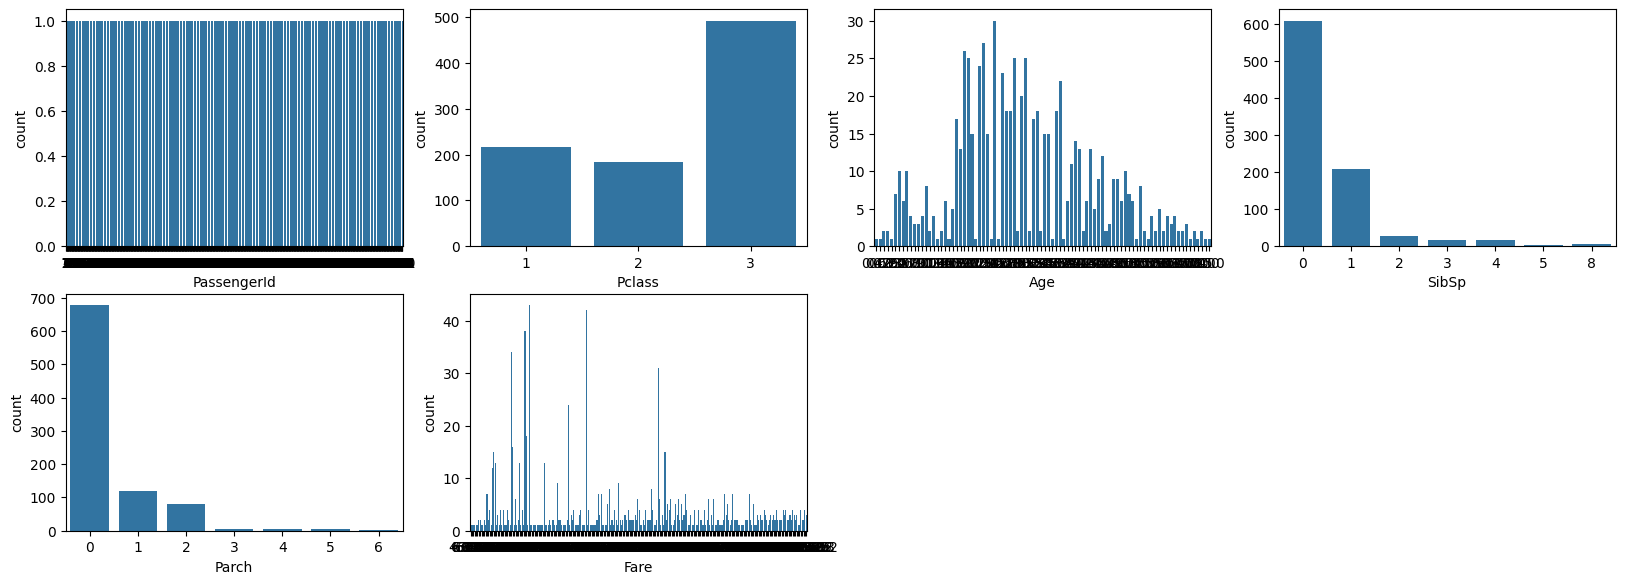

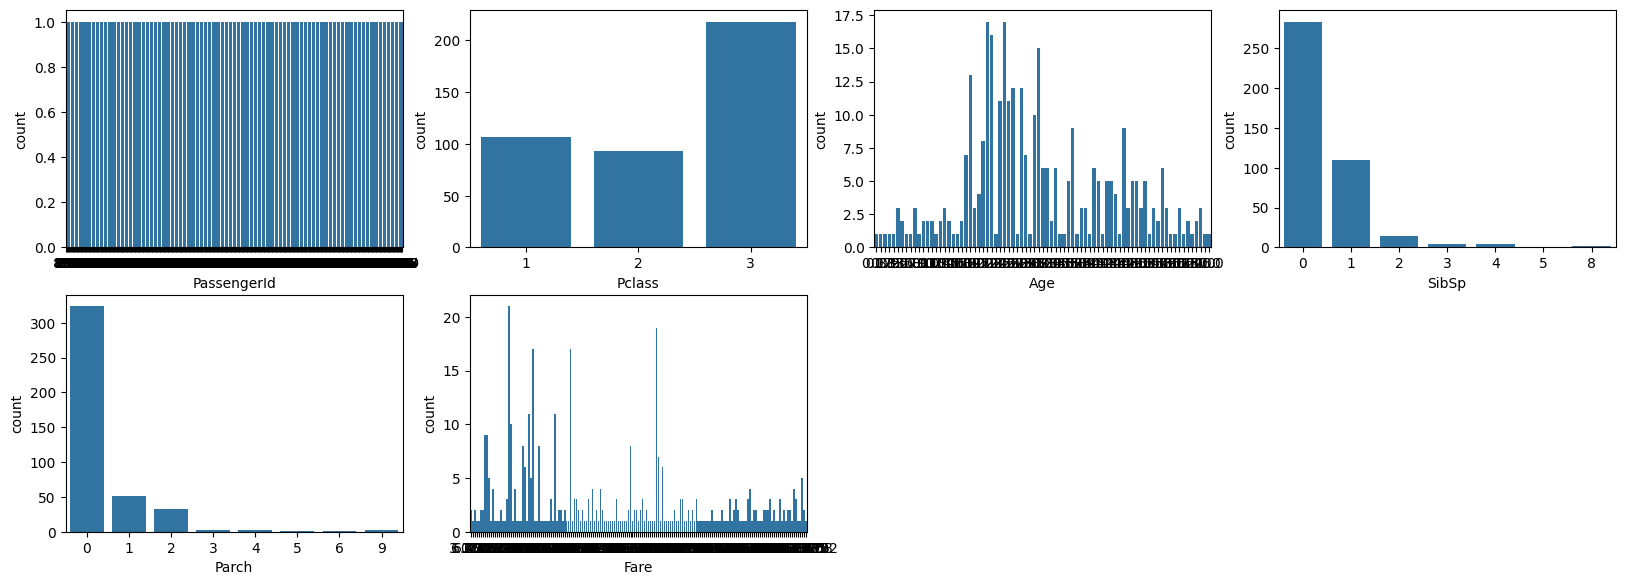

In [43]:
# Plot cardinality for numerical values
cardinalityNumFlag = plt.figure(figsize=(20,40))
ax = []
for i, val in enumerate(num_cols):
    ax.append(cardinalityNumFlag.add_subplot(11, 4, i+1))
    ax.append(sns.countplot(data = train_data, x=val))
plt.show()
cardinalityNumFlag.tight_layout()

# Plot cardinality for numerical values
cardinalityNumFlag = plt.figure(figsize=(20,40))
ax = []
for i, val in enumerate(num_cols):
    ax.append(cardinalityNumFlag.add_subplot(11, 4, i+1))
    ax.append(sns.countplot(data = test_data, x=val))
plt.show()
cardinalityNumFlag.tight_layout()

##### Histograms

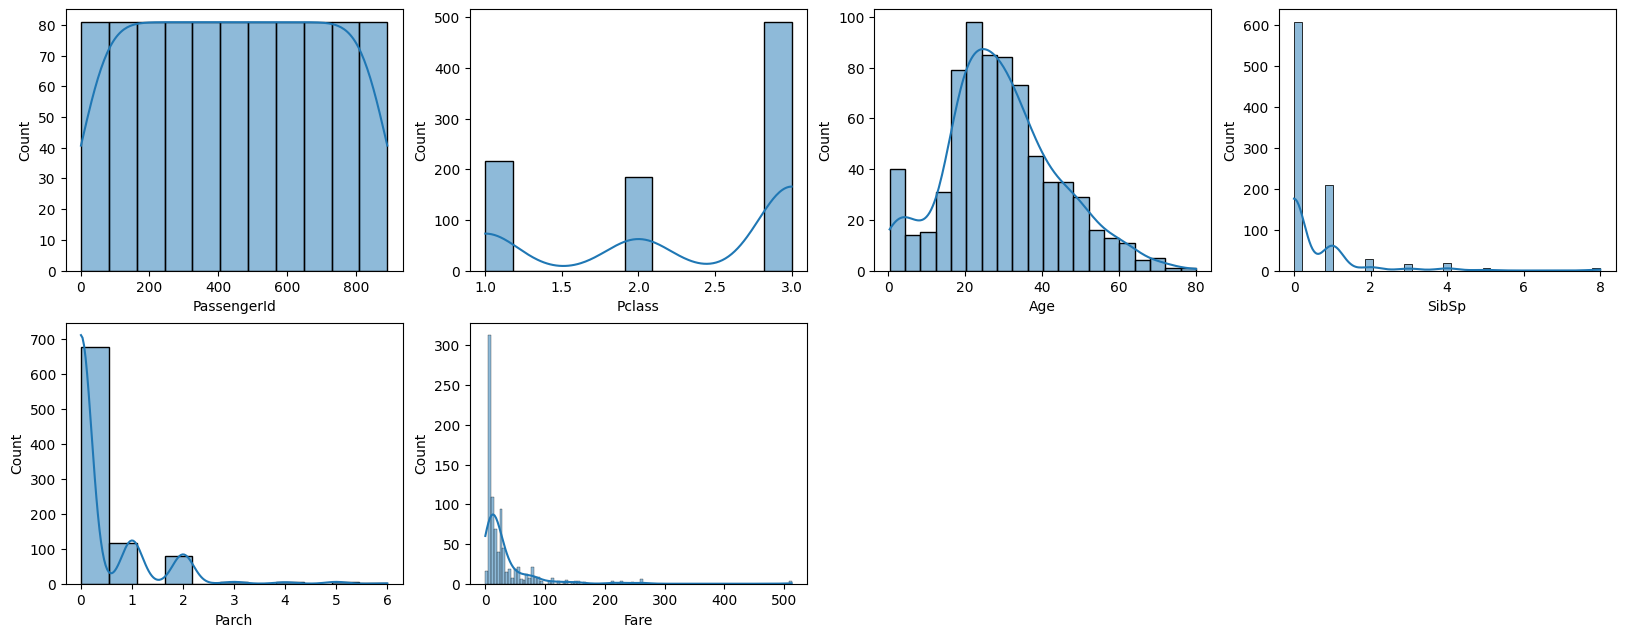

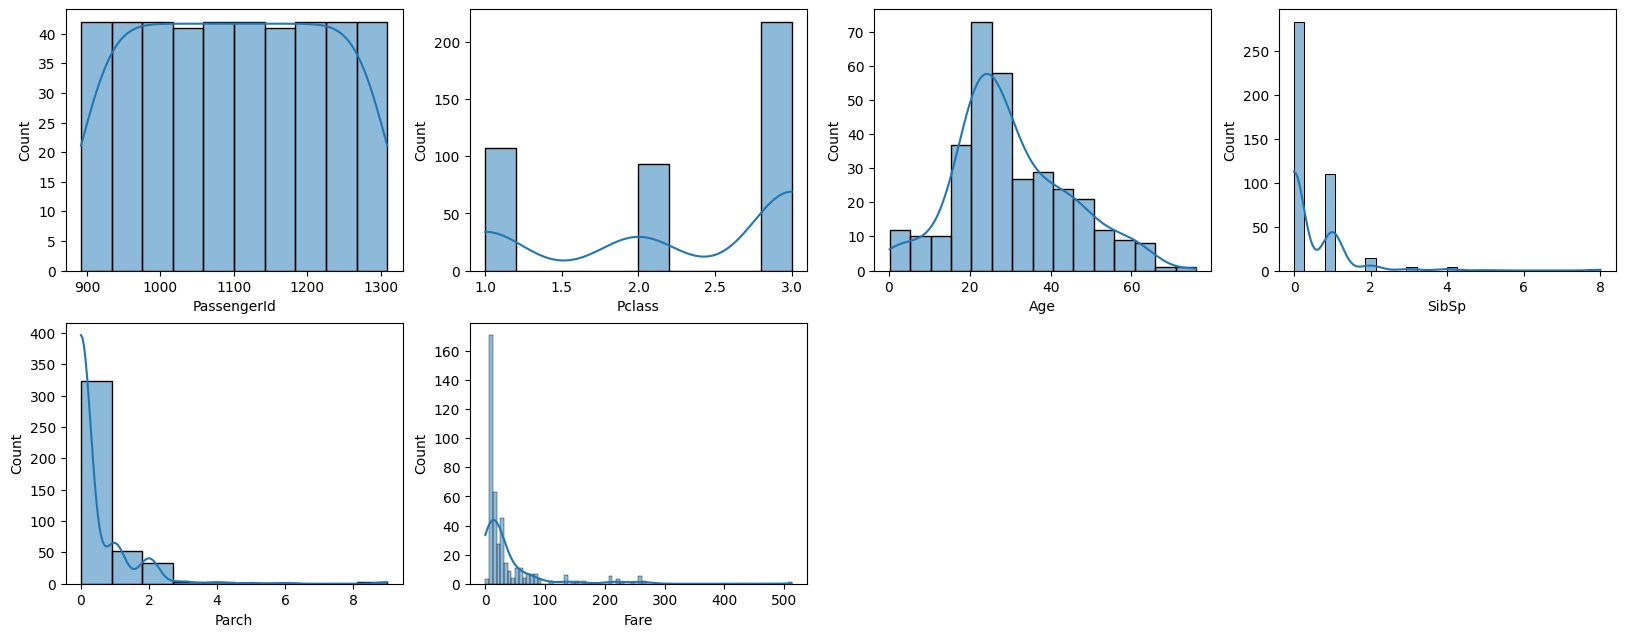

In [42]:
# Histograms
numFig = plt.figure(figsize = (20,40))
ax = []
for i,val in enumerate(num_cols):
    ax.append(numFig.add_subplot(10,4,i+1))
    ax.append(sns.histplot(train_data[val],kde = True))
plt.show()
numFig.tight_layout()

numFig = plt.figure(figsize = (20,40))
ax = []
for i,val in enumerate(num_cols):
    ax.append(numFig.add_subplot(10,4,i+1))
    ax.append(sns.histplot(test_data[val],kde = True))
plt.show()
numFig.tight_layout()

##### Scatterplots

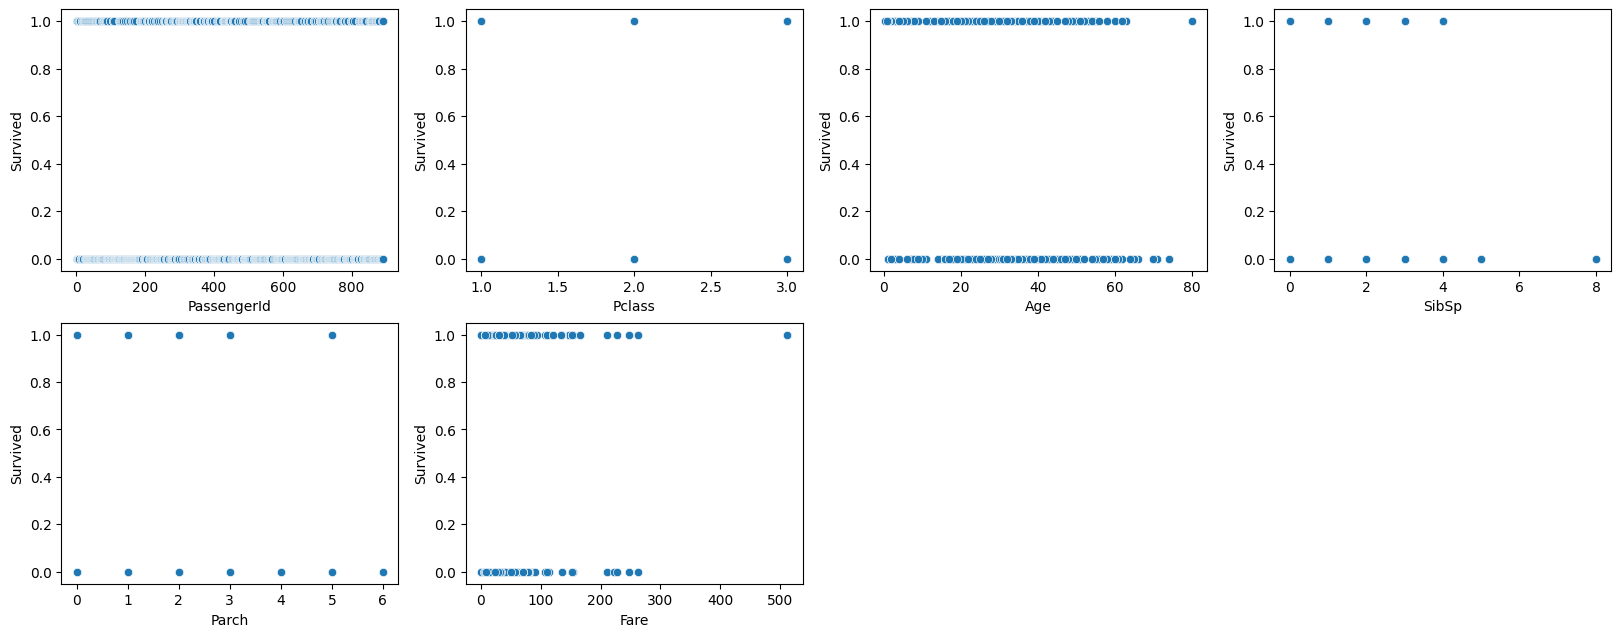

In [28]:
# Scatterplots against the target
scatFig = plt.figure(figsize=(20,40))
ax = []
for i, val in enumerate(num_cols):
    ax.append(scatFig.add_subplot(10, 4, i+1))
    ax.append(sns.scatterplot(x=val, y='Survived', data=pd.concat([num_data_df, train_labels_df])))
plt.show()
scatFig.tight_layout()

# Scatterplots against the target
scatFig = plt.figure(figsize=(20,40))
ax = []
for i, val in enumerate(num_cols):
    ax.append(scatFig.add_subplot(10, 4, i+1))
    ax.append(sns.scatterplot(x=val, y='Survived', data=pd.concat([num_data_df, train_labels_df])))
plt.show()
scatFig.tight_layout()

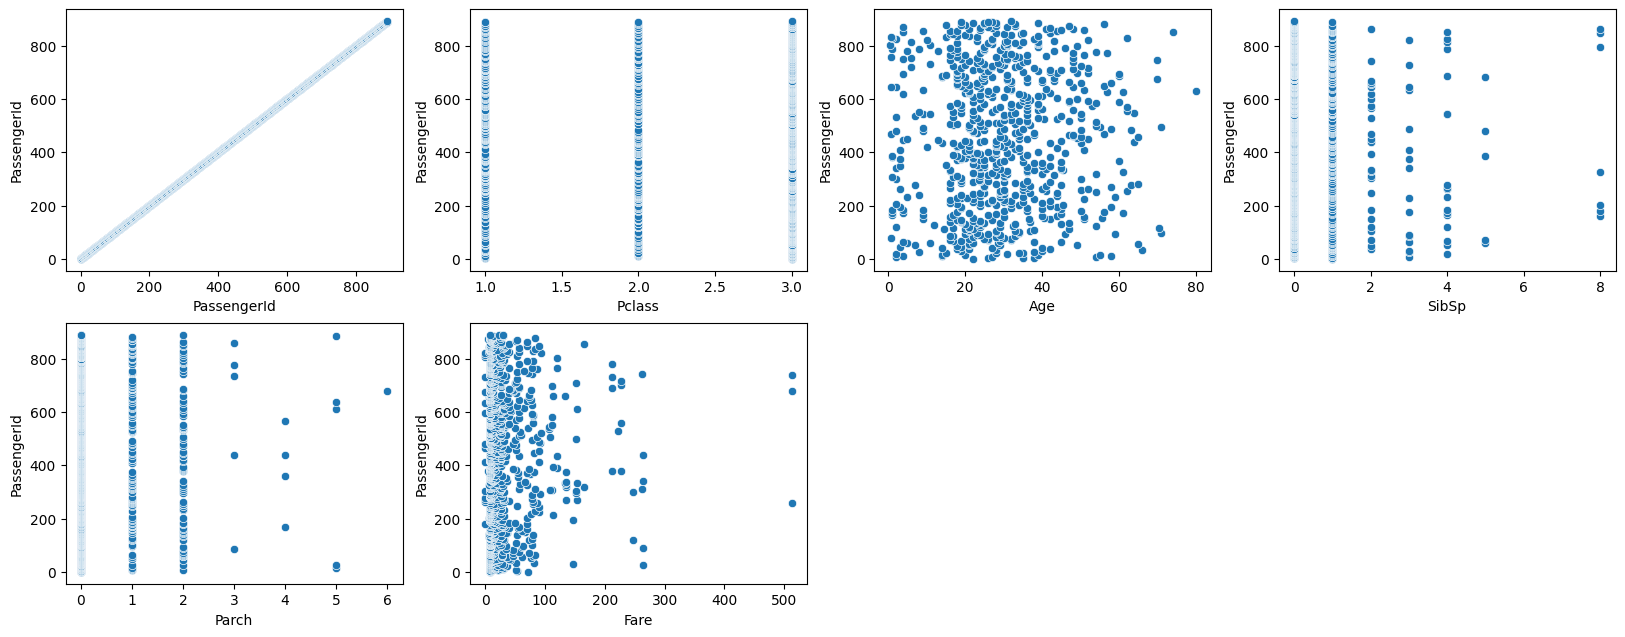

In [29]:
# Scatterplots against the PassengerId
scatFig2 = plt.figure(figsize=(20,40))
ax = []
for i, val in enumerate(num_cols):
    ax.append(scatFig2.add_subplot(10, 4, i+1))
    ax.append(sns.scatterplot(x=val, y='PassengerId', data=num_data_df))
plt.show()
scatFig2.tight_layout()

##### Box Plots

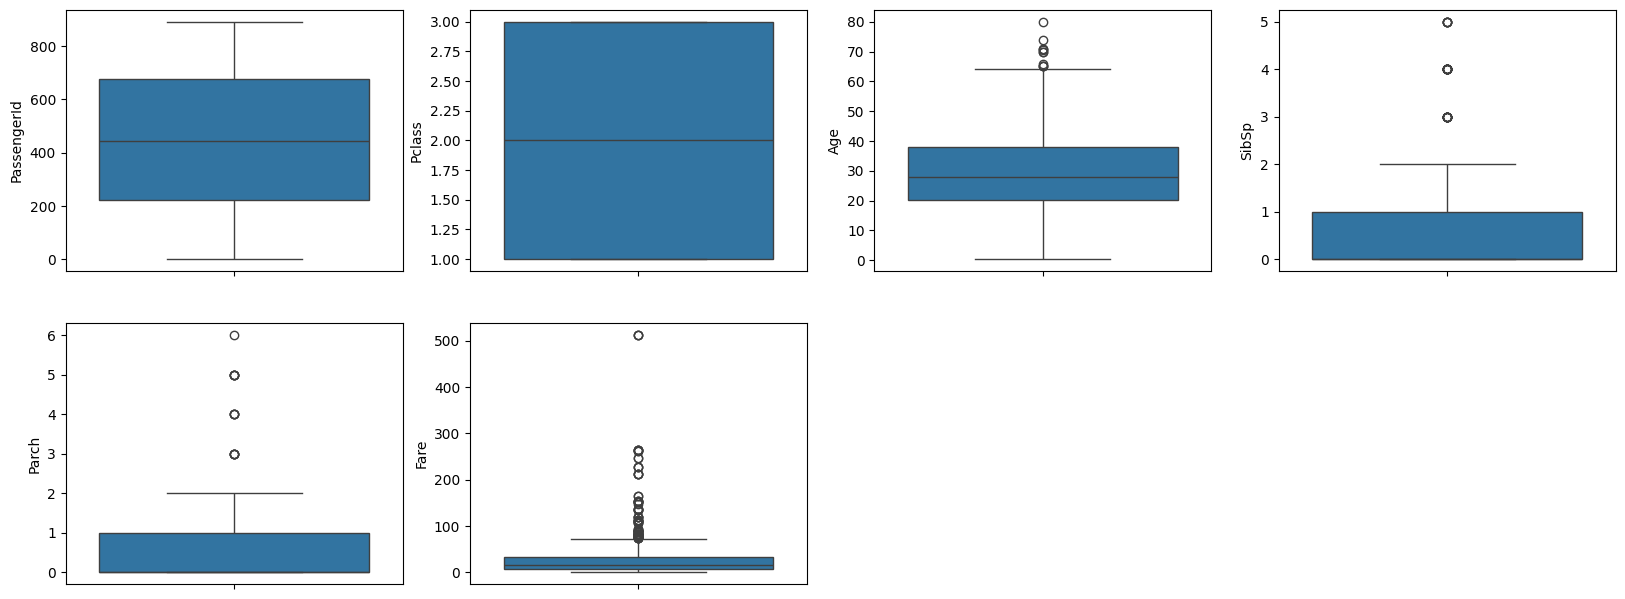

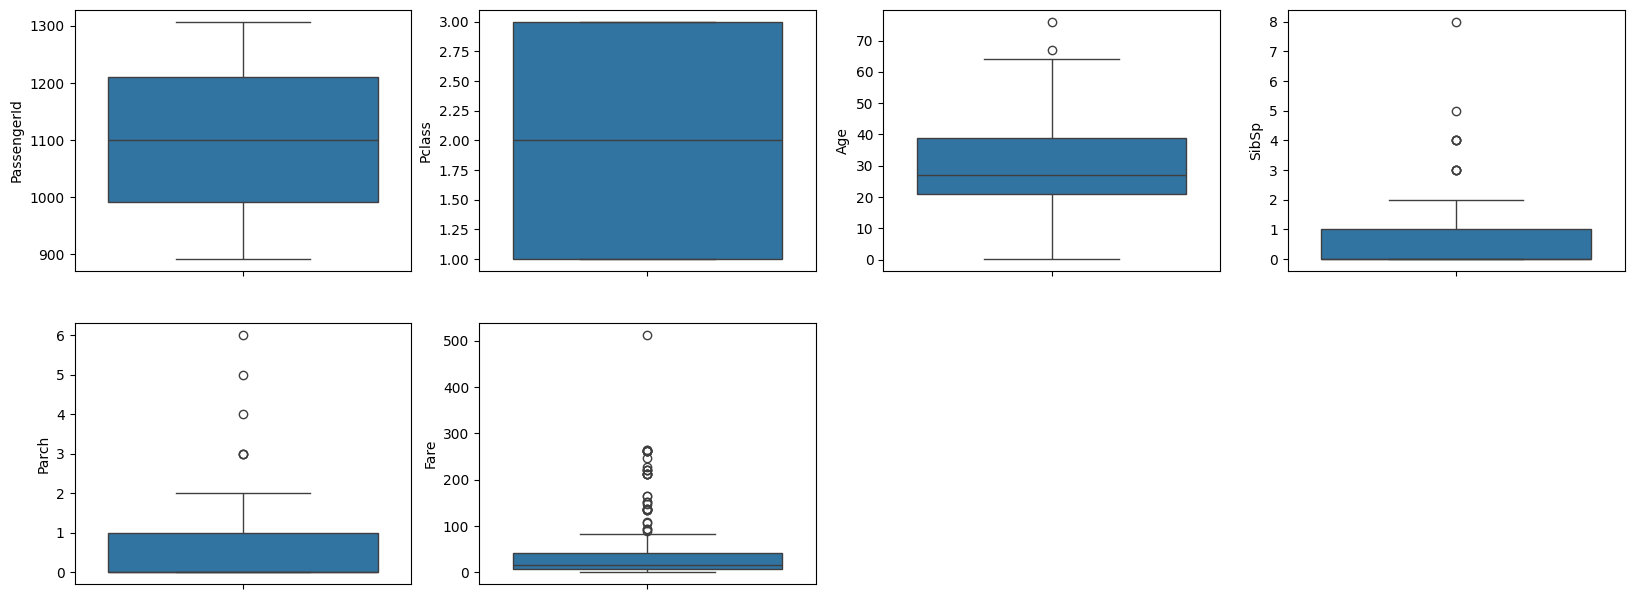

In [44]:
# Plot the box plots for numerical values
fig = plt.figure(figsize = (20,40))
ax = []
for i,val in enumerate(num_cols):
    ax.append(fig.add_subplot(10,4,i+1))
    ax.append(sns.boxplot(y=val, data = train_data[num_cols].dropna()))
plt.show()
fig.tight_layout()

fig = plt.figure(figsize = (20,40))
ax = []
for i,val in enumerate(num_cols):
    ax.append(fig.add_subplot(10,4,i+1))
    ax.append(sns.boxplot(y=val, data = test_data[num_cols].dropna()))
plt.show()
fig.tight_layout()

##### Look for multicollinearity 

<Axes: >

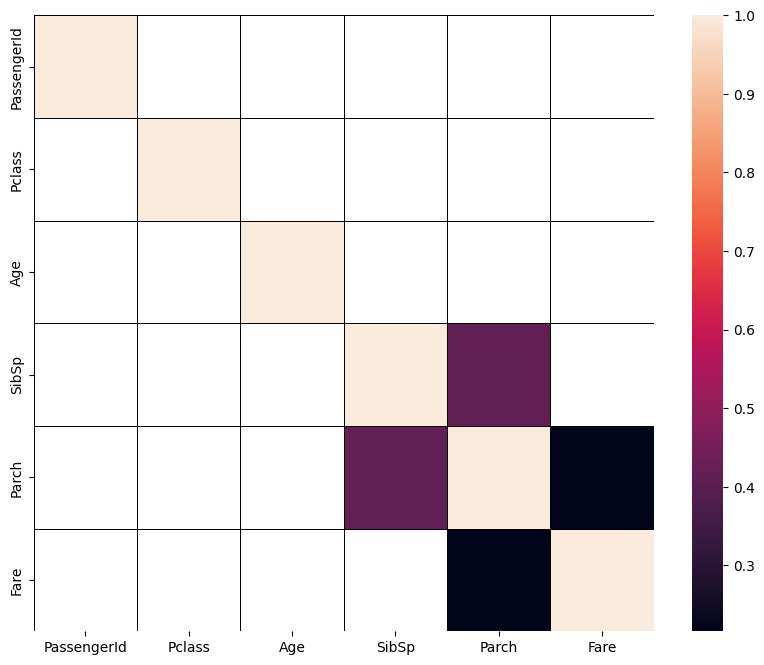

In [ ]:
# Multicollinearity 
threshold = 0.2
plt.figure(figsize=(10,8))
correlation = train_data[num_cols].corr()
sns.heatmap(correlation, mask = correlation <threshold,linecolor='black',linewidth=.5)

##### Missing Numerical Values

<Axes: >

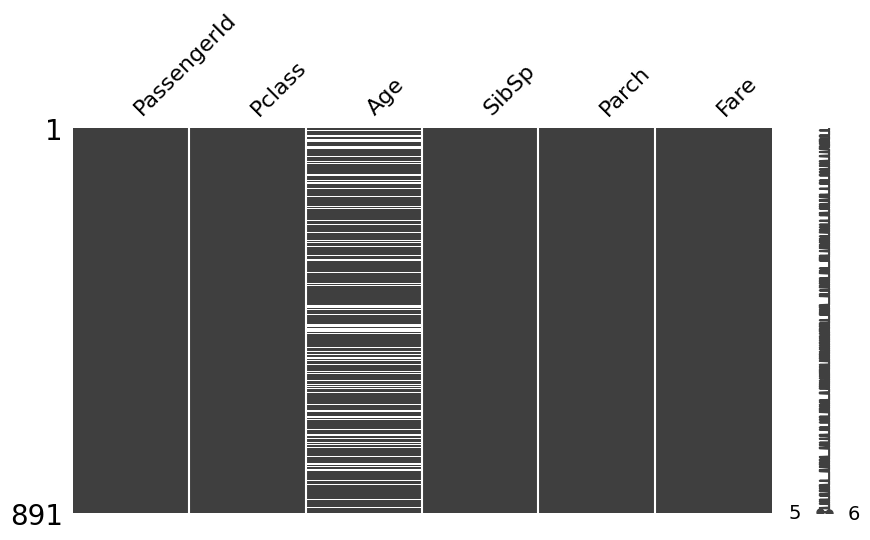

In [40]:
# Missing Numerical Values
msno.matrix(num_data_df, figsize=(10,5))

In [41]:
# Number of missing numerical values
num_data_df.isna().sum()

PassengerId      0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

#### Conclusion on Numerical values

* Definetely we are going to remove the `PassengerId` feature since it does not provide any context to the models
* Some imputing for the `Age` feature

##### Pclass

| **Nature**           | Numerical - Discrete                                                                                                     |
|----------------------|--------------------------------------------------------------------------------------------------------------------------|
| **Description** | Passenger ticket class |
| **Feature Engineering** | This feature seems alright, it is not showing outliers or a weird skewness, so we'll leave as it is for now |
| **Missing values and Imputing**   | We don't have missing values for this one :)                                                                |

##### Age

| **Nature**           | Numerical - Continuos                                                                                                    |
|----------------------|--------------------------------------------------------------------------------------------------------------------------|
| **Description** | Passenger age in years |
| **Feature Engineering** | There are some outliers showing up in the boxplot, `first` check what kind of outliers are (good or bad) `second` in case those are bad ones handle them `third` there's a little bit of positive skew so let's see if we can handle that|
| **Missing values and Imputing**   | There are a missing values in this one `19%`, we can do imputting with the mean                                                                            |

##### SibSp

| **Nature**           | Numerical - Discrete                                                                                                     |
|----------------------|--------------------------------------------------------------------------------------------------------------------------|
| **Description** | # of siblings / spouses aboard the Titanic |
| **Feature Engineering** | There are some outliers showing up in the boxplot, `first` check what kind of outliers are (good or bad) `second` in case those are bad ones handle them |
| **Missing values and Imputing**   | We don't have missing values for this one :)                                                                |

##### Parch

| **Nature**           | Numerical - Discrete                                                                                                     |
|----------------------|--------------------------------------------------------------------------------------------------------------------------|
| **Description** | # of parents / childres aboard the Titanic |
| **Feature Engineering** | There are some outliers showing up in the boxplot, `first` check what kind of outliers are (good or bad) `second` in case those are bad ones handle them |
| **Missing values and Imputing**   | We don't have missing values for this one :)                                                                |

##### Fare

| **Nature**           | Numerical - Continous                                                                                                     |
|----------------------|--------------------------------------------------------------------------------------------------------------------------|
| **Description** | Passenger Fare|
| **Feature Engineering** | There are some outliers showing up in the boxplot, `first` check what kind of outliers are (good or bad) `second` in case those are bad ones handle them |
| **Missing values and Imputing**   | We don't have missing values for this one :)                                                                |